# Monte Carlo simulation of synthetic (toy) datasets for estimation of the uncertainty on a parameter

Toy Monte Carlo is an often used technique to estimate the uncertainty on a parameter that is obtained from an estimator of some distribution of data that is collected in an experiment.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=80)
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 8

First, generate some data that follows an exponential distribution. This will represent the data collected by the experiment.

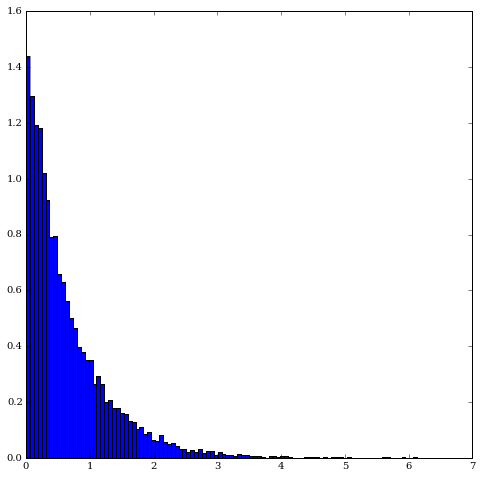

In [20]:
tau = 1.5 # mean and standard deviation
s = np.random.exponential(1/tau, 10000)
count, bins, ignored = plt.hist(s, 100, normed=True)

Next, estimate the lifetime of this dataset. You could use any appropriate estimator here. For example, a chi-squared fit or a maximum likelihood fit. In this simplified case for an exponential starting from 0, the mean of the distribution is a good estimate for the lifetime.

In [21]:
tau_estimate = 1/np.mean(s)
print tau_estimate

1.51920369118


Now we would like an estimate of the uncertainty on this quantity. This can be done by using a Monte Carlo technique where we use the estimate of the lifetime from above to create a new exponential distribution from which we draw many samples. For each new synthetic (toy) dataset that we draw, we compute the estimate for the lifetime using the same method as was used on the original dataset.

In [22]:
N_toys = 1000
toy_tau_estimates = np.zeros(N_toys)
for i in range(N_toys):
    toy_s = np.random.exponential(1/tau_estimate, 10000)
    toy_tau_estimates[i] = 1/np.mean(toy_s)

Let's plot the distribution of toy estimates of the lifetime. The distribution of these should have the same distribution as that of the true (i.e., nature) distribution of datasets and the width of the distribution can be used as an estimate of the uncertainty on the lifetime.

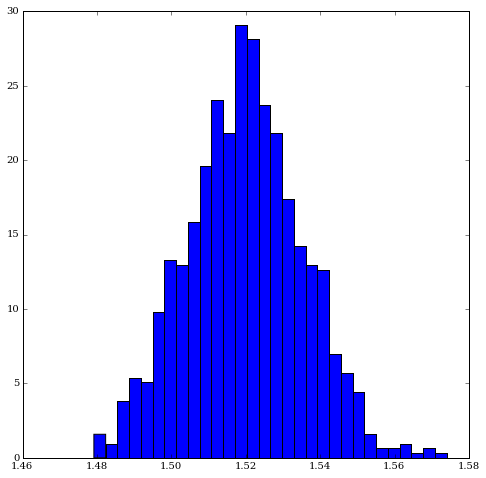

In [23]:
count1, bins1, ignored1 = plt.hist(toy_tau_estimates, 30, normed=True)

In [24]:
print "lifetime = %0.3f +- %0.3f" % (tau_estimate, np.std(toy_tau_estimates))

lifetime = 1.519 +- 0.015


The more toy datasets we generate the more precisely we will know the value of the uncertainty. It needs to be remembered that the value of the uncertainty relates to the size of the dataset that we started with.